In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# Importation et chargement des donnees

In [2]:
Data = pd.read_csv('Data1.csv')
T = pd.read_csv('t1.csv')
print(Data.shape)
print(T.shape)
Data

(997, 301)
(997, 1)


,12160,12352,12672,12096,12672.1,12544,11904,12736,12736.1,12480,...,7232.1,7040,7040.1,7232.2,6912,6784,6976,7488.5,7040.2,7296
0,12160,12288,12672,12800,12928,12544,12864,13056,13184,13376,...,28608,27264,27648,28096,27968,28672,28416,28288,29440,28992
1,3456,3200,3264,3072,3008,2880,3136,3136,3008,3264,...,9856,9984,9856,10240,9920,10496,10304,11008,10624,10560
2,17920,18368,18816,18944,18880,18496,18496,18880,18560,18688,...,6208,5888,6592,6336,6400,6144,5824,6016,5760,5824
3,3712,3200,3840,3968,3456,3392,4224,3968,3968,4032,...,27072,26880,28160,27648,27776,27328,27456,28608,27776,28224
4,12736,12416,12224,12288,12352,12416,11584,12416,11648,11712,...,11008,10880,11584,11968,11520,12224,11968,12736,12288,12288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,9664,8960,9408,10688,9920,8832,9408,10944,10624,9024,...,12416,15552,16768,13760,12416,14976,16960,14016,12480,15104
993,10240,10944,9984,9216,10112,10816,9664,8896,10368,10880,...,13952,12224,14336,16832,14720,12352,14080,17984,15296,12224
994,8640,9408,10816,10048,9088,9664,10496,9984,8896,9408,...,16064,15424,12480,12864,16448,15808,12544,12800,16128,16896
995,10496,9344,8768,9792,10560,9664,9344,10048,10752,9728,...,12736,15552,17472,13952,12352,15872,16704,14144,12416,14976


In [3]:
I = Data.values # Pour charger le dataframe dans un tableau numpy afin de manipuler aisement
t = T.values    # Pareil
print(I.shape)
print(t.shape)

(997, 301)
(997, 1)


# Allure des courbes pour quelques colonnes du dataset

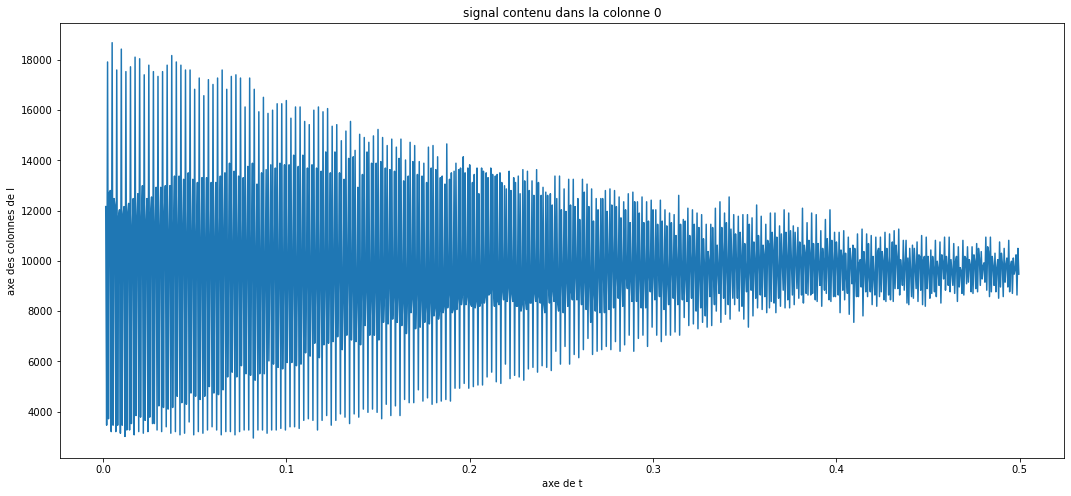

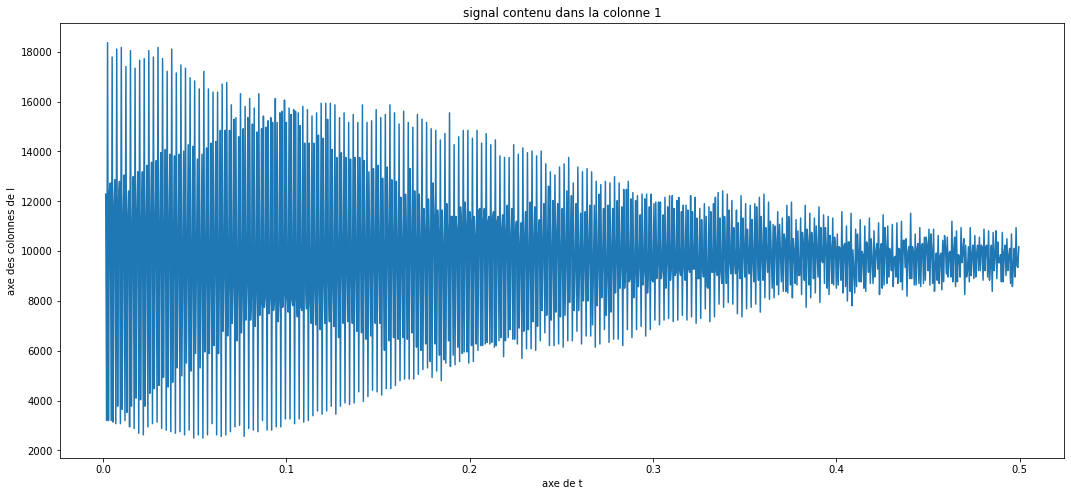

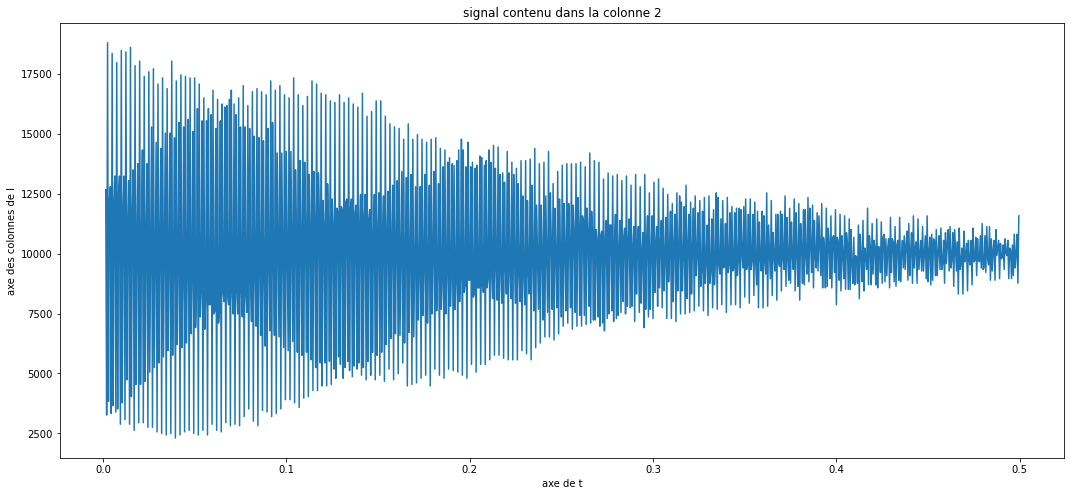

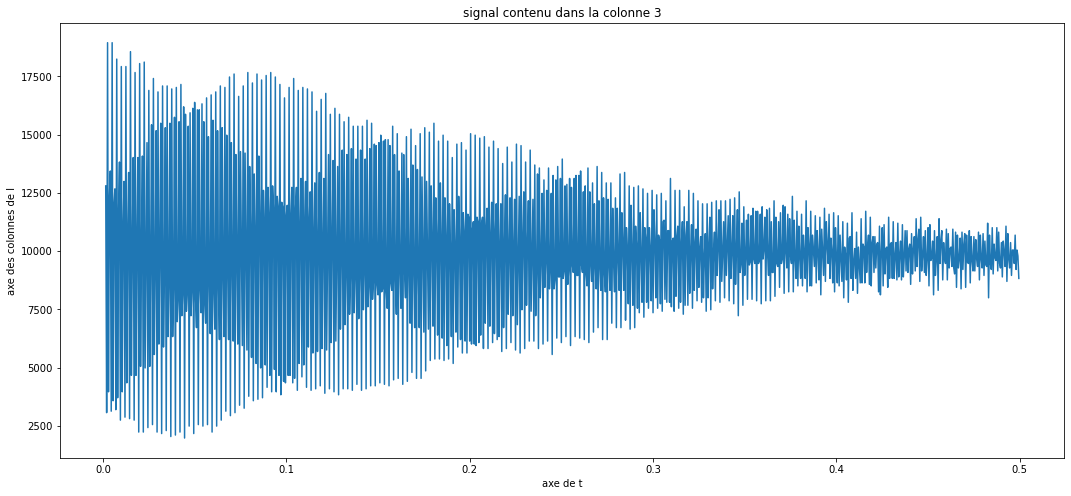

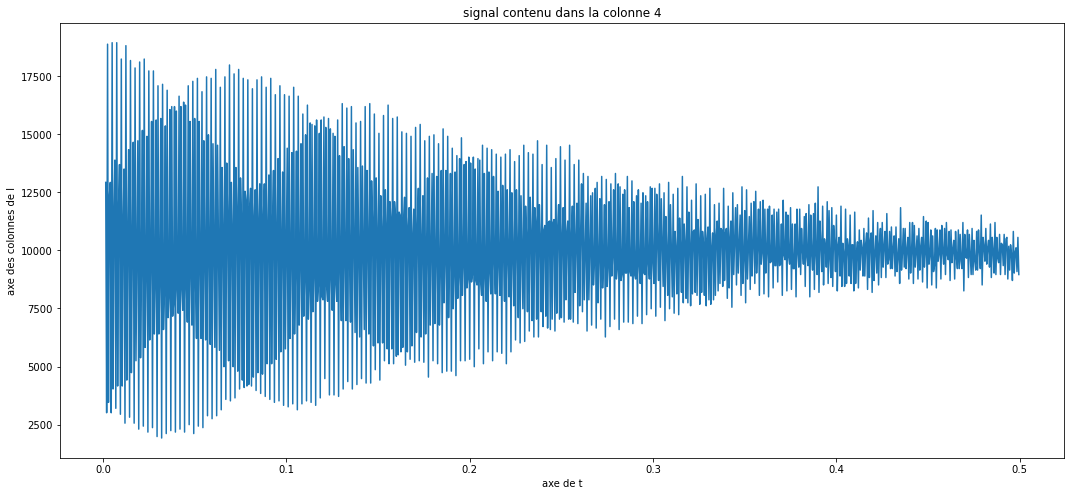

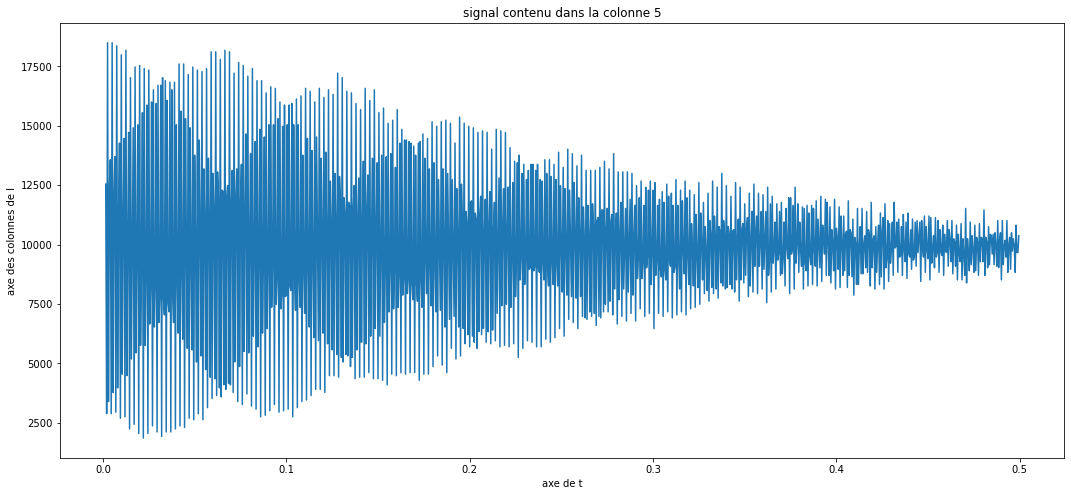

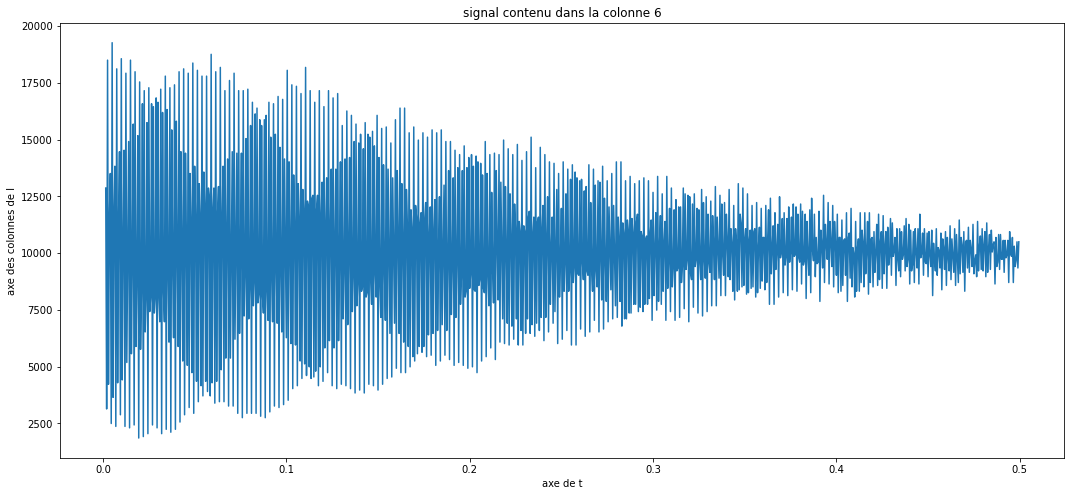

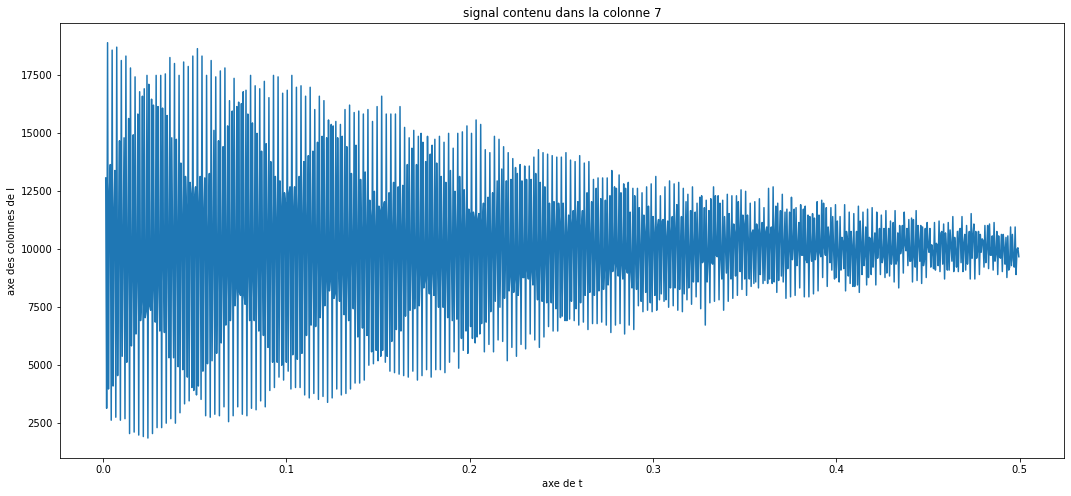

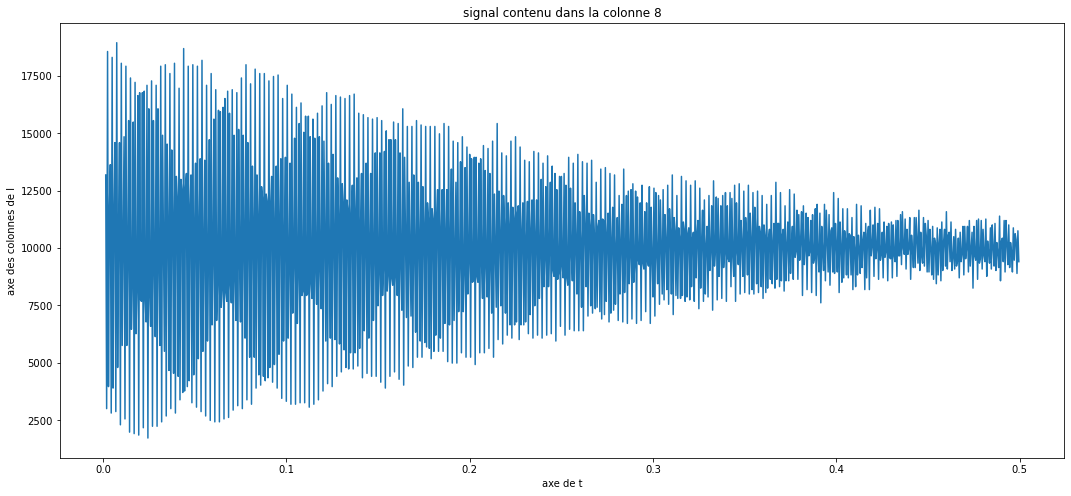

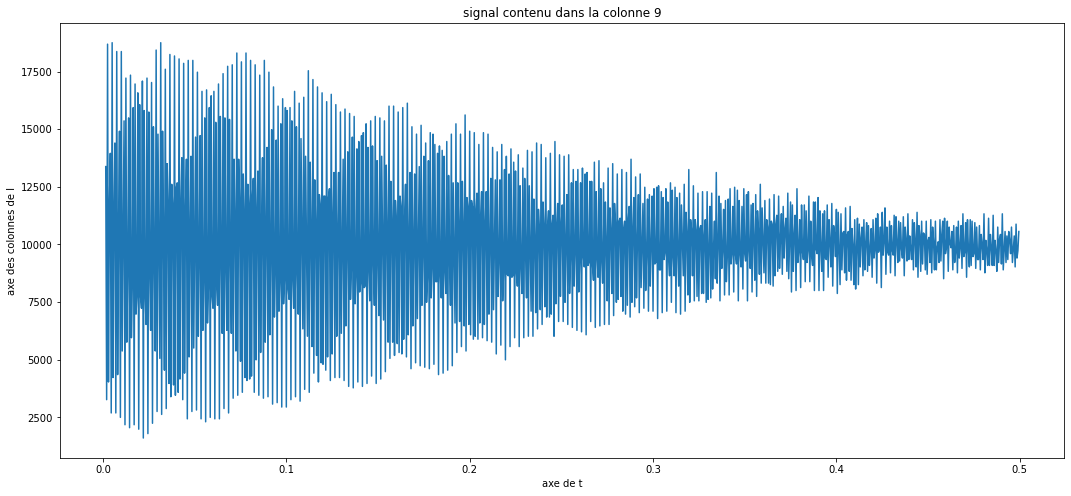

In [4]:
for i in range(10):
    plt.figure(figsize=(18,8))
    plt.plot(t,I[:,i])
    plt.title('signal contenu dans la colonne {}'.format(i))
    plt.xlabel('axe de t')
    plt.ylabel('axe des colonnes de I')
    plt.show()

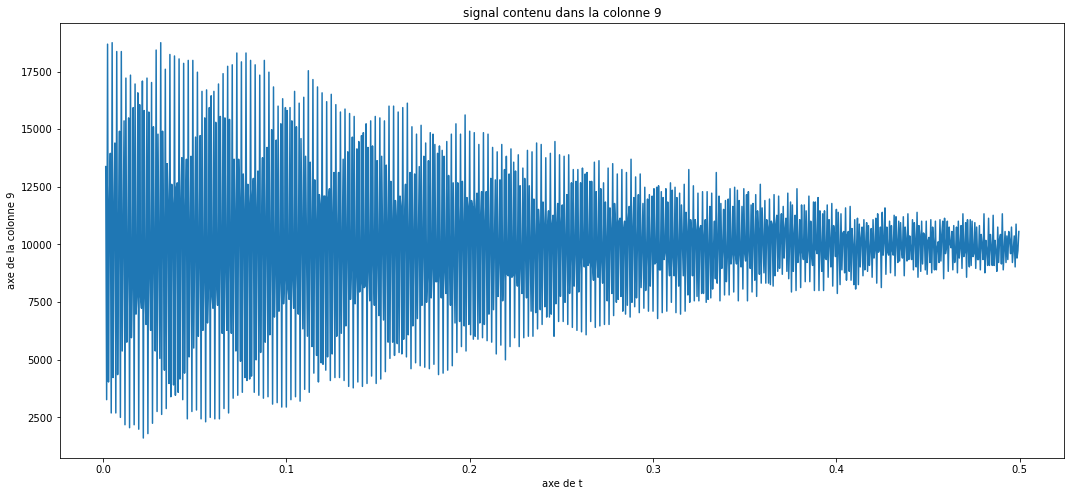

In [5]:
plt.figure(figsize=(18,8))
plt.plot(t,I[:,9])
plt.title('signal contenu dans la colonne 9')
plt.xlabel('axe de t')
plt.ylabel('axe de la colonne 9')
plt.show()

# Pour une bonne initialisation de l'algorithme, la frequence f doit etre proche de la frequence contenu dans le signal
## **-** On fait dans un premier temps, une transformee de fourier du signal
## **-** Et on cherches les differentes frequences rencontree dans notre signal

997


C:\Users\ARMANDO\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'axe de la transformee')

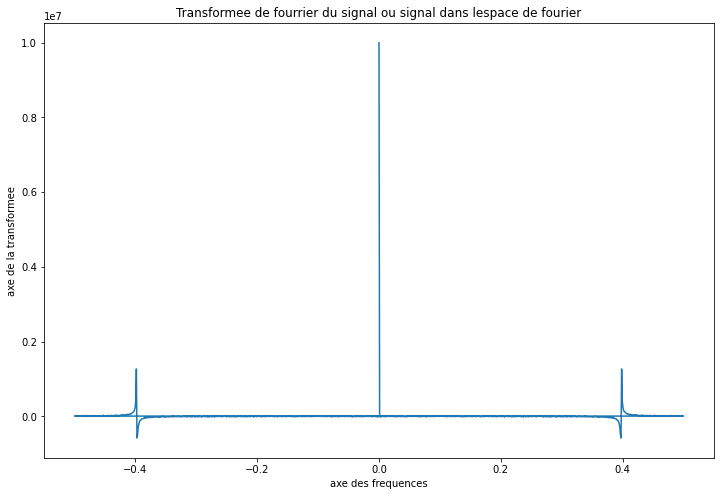

In [6]:
from scipy import fftpack
x = I[:,9]
x_F = fftpack.fft(x)
power = np.abs(x_F)
print(x.size)
frequences = fftpack.fftfreq(x.size)
plt.figure(figsize=(12,8))
plt.title('Transformee de fourrier du signal ou signal dans lespace de fourier')
plt.plot(frequences,x_F)
plt.xlabel('axe des frequences')
plt.ylabel('axe de la transformee')

# - Modele associe aux donnees

In [7]:
np.random.seed(0)
theta = np.random.randn(7,1)
theta[-2]=frequences[frequences.argmax()]
def model(t,theta):
    model = theta[0]*np.ones((t.shape[0],1)) + theta[1]*t + theta[2]*(np.exp(-theta[3]*t**2 + theta[4]*t))*(np.cos(2*np.pi*theta[-2]*t - theta[-1]))
    return model

## Derivee du modele par rapport a chaque parametre ( qui donne un vecteur (998,1)):  theta=[a,a',b,alpha,mu,f,phi]

In [8]:
# gradient du modele par rapport a a (998*1)
def grad_0(t,theta):
    return np.ones((t.shape[0],1))

# gradient du modele par rapport a a' (998*1)
def grad_1(t,theta):
    return t

# gradient du modele par rapport a b (998*1)
def grad_2(t,theta):
    return (np.exp(-theta[3]*t**2+theta[4]*t))*(np.cos(2*np.pi*theta[-2]*t - theta[-1]*np.ones((t.shape[0],1))))

# gradient du modele par rapport a alpha (998*1)
def grad_3(t,theta):
    return (-theta[2]*t**2)*(grad_2(t,theta))

# gradient du modele par rapport a mu (998*1)
def grad_4(t,theta):
    return (theta[2]*t)*(grad_2(t,theta))

# gradient du modele par rapport a a (998*1)
def grad_6(t,theta):
    return theta[2]*(np.exp(-theta[3]*t**2+theta[4]*t))*(np.sin(2*np.pi*theta[-2]*t - theta[-1]*np.ones((t.shape[0],1))))

# gradient du modele par rapport a phi (998*1)
def grad_5(t,theta):
    return (-2*np.pi*t)*(grad_6(t,theta))

# - Fonction d'erreur (cout)

In [9]:
x = I[:,9].reshape((I.shape[0],1))
def cost_function(t,x,theta):
    N = t.shape[0]
    C = (1/2*N)*(x - model(t,theta)).T.dot(x - model(t,theta))
    C = C[0,0]
    return C

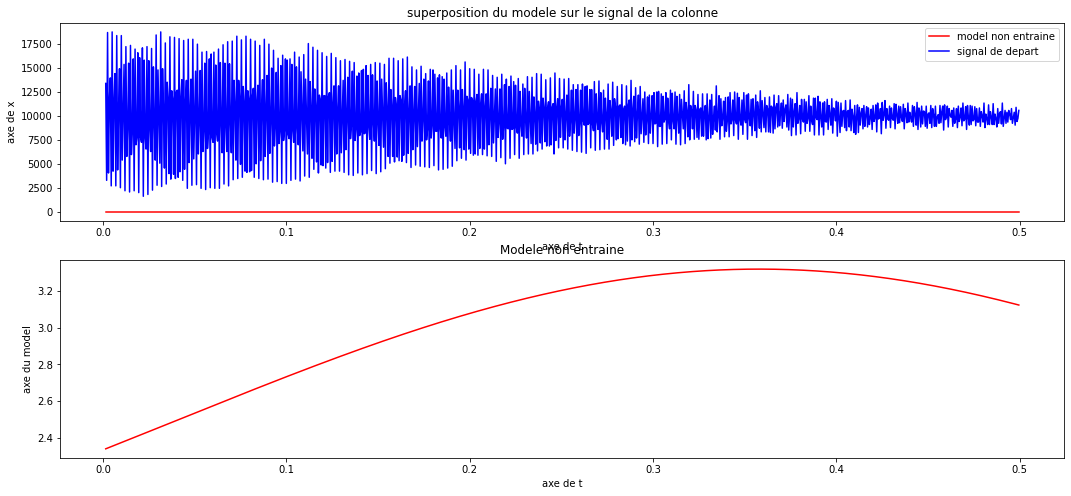

In [10]:
cost_function(t,x,theta)

plt.figure(figsize=(18,8))
plt.subplot(2,1,1)
plt.title('superposition du modele sur le signal de la colonne')
plt.plot(t,model(t,theta),c='r',label="model non entraine")
plt.plot(t,x,c='b',label="signal de depart")
plt.xlabel('axe de t')
plt.ylabel('axe de x')
plt.legend()

plt.subplot(2,1,2)
plt.title('Modele non entraine')
plt.plot(t,model(t,theta),c='r')
plt.xlabel('axe de t')
plt.ylabel('axe du model')
plt.show()

# On constate qu'il n'entre pas correctement dans nos donnees d'ou la necessite de l'entraine

## Derivation de la fonction cout par rapport aux differents parametres 

In [11]:
def grad_c0(x,t,theta):
    return (-1/t.shape[0])*(x - model(t,theta)).T.dot(grad_0(t,theta))
def grad_c1(x,t,theta):
    return (-1/t.shape[0])*(x - model(t,theta)).T.dot(grad_1(t,theta))
def grad_c2(x,t,theta):
    return (-1/t.shape[0])*(x - model(t,theta)).T.dot(grad_2(t,theta))
def grad_c3(x,t,theta):
    return (-1/t.shape[0])*(x - model(t,theta)).T.dot(grad_3(t,theta))
def grad_c4(x,t,theta):
    return (-1/t.shape[0])*(x - model(t,theta)).T.dot(grad_4(t,theta))
def grad_c5(x,t,theta):
    return (-1/t.shape[0])*(x - model(t,theta)).T.dot(grad_5(t,theta))
def grad_c6(x,t,theta):
    return (-1/t.shape[0])*(x - model(t,theta)).T.dot(grad_6(t,theta))

In [12]:
grad_c6(x,t,theta)

array([[1380.78805229]])

# Gradient de la fonction cout (vecteur 7*1)

In [13]:
def gradient_cout(x,t,theta):
    gradient = np.concatenate((grad_c0(x,t,theta),grad_c1(x,t,theta),grad_c2(x,t,theta),grad_c3(x,t,theta),
                               grad_c4(x,t,theta),grad_c5(x,t,theta),grad_c6(x,t,theta)),axis=0)
    return gradient

In [14]:
gradient_cout(x,t,theta)

array([[-10027.69495479],
       [ -2506.97941726],
       [-12008.56506527],
       [  1094.54218075],
       [ -3223.96872189],
       [  2468.49777338],
       [  1380.78805229]])

# - Entrainement du modele par descente de gradient

In [15]:
def Descente_de_gradient(x,t,theta, mu,n_iter):
    # Algorithme de la descente de gradient proprement dite
    m = t.shape[0]
    h = 7
    theta_history = np.zeros((n_iter,7))
    cost_history = np.zeros(n_iter)
    for i in range(0,n_iter):
        # parametre du modele
        theta = theta - mu*gradient_cout(x,t,theta)
        theta_history[i,:] = theta.T
        # modele
        model_ = model(t,theta)
        cost_history[i] = cost_function(t,x,theta)
    
    return cost_history, model_, theta
        

##  - Courbe de la diminution de la fonction cout au fil des iterations

In [16]:
cost_history, model_, theta = Descente_de_gradient(x,t,theta, mu=0.001,n_iter=100000)

In [17]:
cost_function(t,x,theta)

5983190427970.772

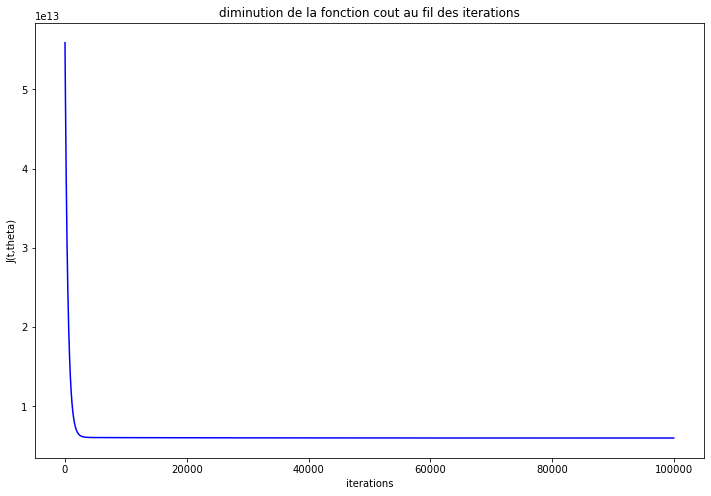

In [18]:
# Affichages des courbes
plt.figure(figsize=(12,8))
plt.title('diminution de la fonction cout au fil des iterations')
plt.plot(cost_history,c='blue')
plt.xlabel('iterations')
plt.ylabel('J(t,theta)')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

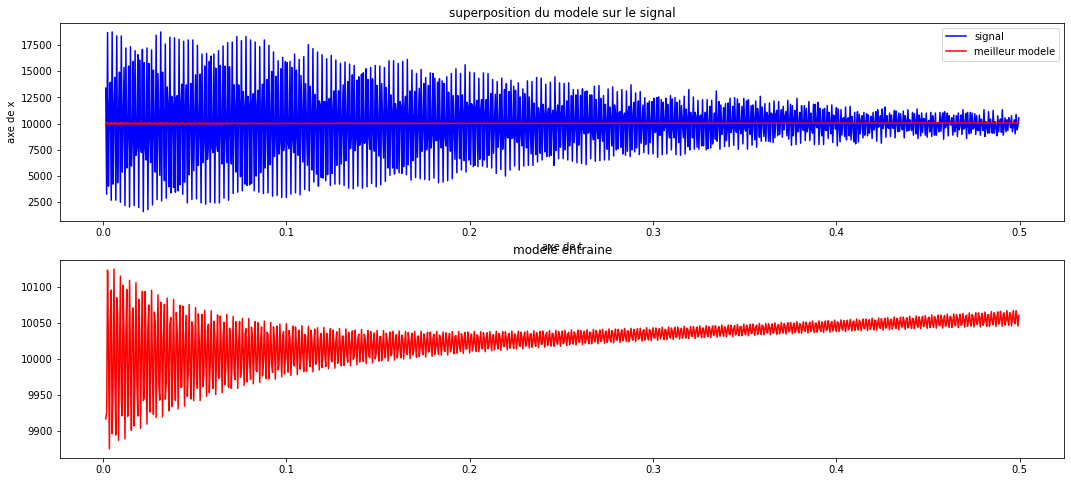

In [19]:
plt.figure(figsize=(18,8))
plt.subplot(2,1,1)
plt.title('superposition du modele sur le signal')
plt.plot(t, x, label='signal', c='b')
plt.plot(t, model_, label='meilleur modele', c='r')
plt.xlabel('axe de t')
plt.ylabel('axe de x')
plt.legend()

plt.subplot(2,1,2)
plt.title('modele entraine')
plt.plot(t,model_,c='r')
plt.show

In [20]:
theta

array([[10000.59048389],
       [  113.04513587],
       [  135.31540361],
       [  -20.09900148],
       [  -15.00264186],
       [ -585.08229567],
       [  172.67560461]])